In [1]:
# Pandas library for the pandas dataframes
import pandas as pd    
import numpy as np

# Import Scikit-Learn library
import sklearn         
from sklearn import linear_model, datasets
from sklearn.utils import resample
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import f_regression, SequentialFeatureSelector
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

# Import plotting libraries
import seaborn as sns
import matplotlib 
from matplotlib import pyplot as plt


# Set larger fontsize for all plots
matplotlib.rcParams.update({'font.size': 18})
from IPython.display import clear_output

# Command to automatically reload modules before executing cells
# not needed here but might be if you are writing your own library 
%load_ext autoreload
%autoreload 2

# Import cleaning and splitting functions
from clean_split_data import clean_data
from clean_split_data import split_data

### Data

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data = clean_data(data)
X_train, X_test, y_train, y_test = split_data(data)

### Classifier Preprocessing

In [4]:
n_estimators = [1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 100]
n_mse_list = []
for estimators in n_estimators:
    clf_RF = RandomForestClassifier(n_estimators=estimators, random_state=42)
    clf_RF.fit(X_train, y_train)
    y_RF = clf_RF.predict(X_test)
    n_mse_list.append(mean_squared_error(y_test, y_RF))

Text(0.5, 1.0, 'MSE at different n_estimators')

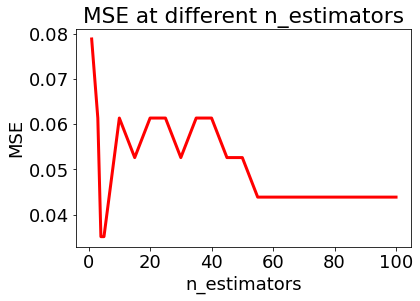

In [5]:
plt.plot(n_estimators, n_mse_list, c='r', linewidth=3)
plt.xlabel('n_estimators')
plt.ylabel('MSE')
plt.title('MSE at different n_estimators')

Therefore choose 4 as the n_estimators

### Classifier

In [6]:
clf = RandomForestClassifier(n_estimators=4, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=4, random_state=42)

### Random Forest Prediction with all 10 features

In [7]:
def predict(test_data):
    
    #test_data = pd.DataFrame(test_data).T
    y_pred = clf.predict(test_data)
   
    return y_pred

In [8]:
y_pred = predict(X_test)

In [9]:
'''Accuracy and MSE Using ALL 10 features'''

accuracy_1 = accuracy_score(y_test, y_pred)
print("Prediction accuracy MSE: ", mean_squared_error(y_test, y_pred))
print("Accuracy score", accuracy_score(y_test, y_pred))

Prediction accuracy MSE:  0.03508771929824561
Accuracy score 0.9649122807017544


### Sample Train, Test, Split Results

In [10]:
def sample_results():
    ''' 
    Returns the results and confusion matrix of the sample dataset from Breast Cancer Wisconsin Dataset.
    '''
    y_pred = clf.predict(X_test)
    print("Prediction accuracy MSE: ", mean_squared_error(y_test, y_pred))
    print("Mean accuracy on test set", clf.score(X_test, y_test))
    print("The confusion matrix for the sample dataset using a decision tree is displayed below: ")
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(clf, X_test, y_test)
    plt.show()
    
    return

Prediction accuracy MSE:  0.03508771929824561
Mean accuracy on test set 0.9649122807017544
The confusion matrix for the sample dataset using a decision tree is displayed below: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        71
           1       1.00      0.91      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



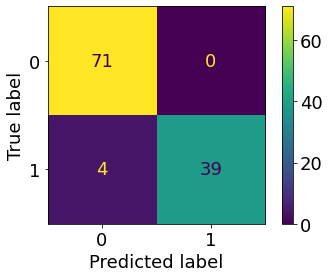

In [11]:
'''This matrix is only for Non-stepwise SVM only'''
sample_results()

### Backwards Stepwise Feature Selection (MSE adn AC using 1 to 9 features)

In [12]:
'''Load the cleaned original dataset for below use'''
X = data[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]
y = data.diagnosis

'''A list of for the for-loop'''
n = [1,2,3,4,5,6,7,8,9]

list_MSE=[]
list_AC=[]
list_MSE_1=[]
list_AC_1=[]
selected_features = []

clf = RandomForestClassifier(n_estimators=4, random_state=42)

for i in n:
    '''Only passing the training data set into the Feature Selector'''
    '''Any preprocessing method should not be fitted on the whole dataset to prevent carrying information from the train set
       to test set'''
    sbs_backward = SequentialFeatureSelector(clf,
                                             n_features_to_select=i,
                                             direction='backward').fit(X_train, y_train)
    selected = sbs_backward.get_support(indices=True)
    '''passing the selected features to the orginial dataset for each number of i'''
    f_names = np.array(X.columns)
    x_manip = X[f_names[selected]]
    selected_features.append(f_names[selected])
    
    '''Spliting the original data set with selected feature for each number of i'''
    X_train1, X_test1, y_train1, y_test1 = train_test_split(x_manip, y , test_size=0.2, random_state=42) 
    
    model = clf
    model.fit(X_train1, y_train1)
    
    y_pred1 = model.predict(X_test1)
    y_pred2 = model.predict(X_train1)
    
    list_AC.append(accuracy_score(y_test1, y_pred1))
    list_AC_1.append(accuracy_score(y_train1, y_pred2))
    list_MSE.append(mean_squared_error(y_test1, y_pred1))
    list_MSE_1.append(mean_squared_error(y_train1, y_pred2))

<function matplotlib.pyplot.show(close=None, block=None)>

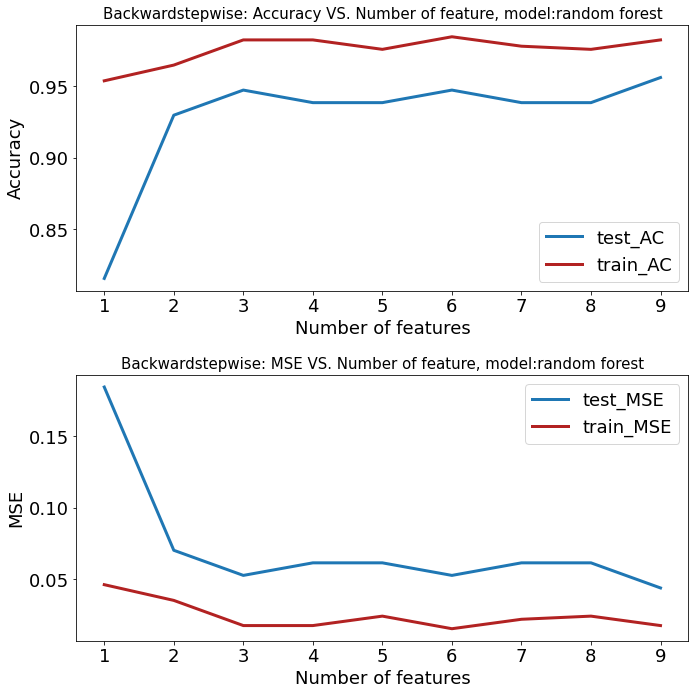

In [13]:
fig,ax = plt.subplots(2,1,figsize=(10,10))

#ax[1].plot(input_features_count, list_test_R2, label='Test Set R2', c='r', linewidth=4)
#ax[1].plot(input_features_count, list_training_R2, label='Train Set R2', c='b', linewidth=4)
#ax[1].set_xlabel('Input Features')
#ax[1].set_ylabel('R2')
#ax[1].set_title('R2 of Train and Test sets vs Input Features')
#ax[1].legend()

ax[0].plot(n, list_AC, linewidth=3 ,alpha=1,label='test_AC')
ax[0].plot(n, list_AC_1, linewidth=3, alpha=1,c='FireBrick',label='train_AC')
ax[0].set_title('Backwardstepwise: Accuracy VS. Number of feature, model:random forest', fontsize=15)
ax[0].set_xlabel('Number of features')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

ax[1].plot(n, list_MSE, linewidth=3 ,alpha=1,label='test_MSE')
ax[1].plot(n, list_MSE_1, linewidth=3, alpha=1,c='FireBrick',label='train_MSE')
ax[1].set_title('Backwardstepwise: MSE VS. Number of feature, model:random forest', fontsize=15)
ax[1].set_xlabel('Number of features')
ax[1].set_ylabel('MSE')
ax[1].legend()

plt.tight_layout()
plt.show

Prediction accuracy MSE:  0.043859649122807015
Mean accuracy on test set 0.956140350877193
The confusion matrix for the sample dataset using a decision tree is displayed below: 
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



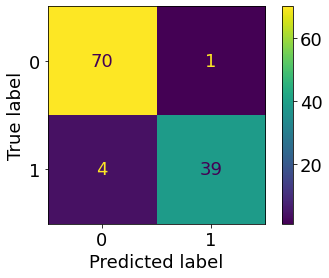

In [14]:
'''This matrix is for Backward Stepwise SVM with 9 features'''
plot_confusion_matrix(model, X_test1, y_test1)
print("Prediction accuracy MSE: ", mean_squared_error(y_test1, y_pred1))
print("Mean accuracy on test set", model.score(X_test1, y_test1))
print("The confusion matrix for the sample dataset using a decision tree is displayed below: ")
print(classification_report(y_test1, y_pred1))

plt.show()

In [15]:
print(list_AC)
print(list_MSE)

[0.8157894736842105, 0.9298245614035088, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.956140350877193]
[0.18421052631578946, 0.07017543859649122, 0.05263157894736842, 0.06140350877192982, 0.06140350877192982, 0.05263157894736842, 0.06140350877192982, 0.06140350877192982, 0.043859649122807015]


**Based on the above informaiton,  the Best number of parameters for random forest is 10**

###  Optimized Random Forest Predictor ###

In [16]:
#selected_features[8]

In [17]:
def feature_names():
    '''
    Returns array of input features of best performing backwards stepwise selection test.
    '''
    
    return ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

In [18]:
def predict(test_data):
    '''
    Takes test data and uses classifier to predict boolean output.
    '''
    X = data[feature_names()]
    y = data.diagnosis
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    clf = SVC(kernel='rbf', C=10000)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(test_data)
    
    return y_pred